In [1]:
#Importing Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [2]:
# Passing CSV into matches
matches=pd.read_excel('IPL_2020.xlsx')
matches.head()

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,...,win_by_runs,win_by_wickets,player_of_match,venue,Avg 1st Innings Score,Avg 2nd Innings Score,umpire1,umpire2,umpire3,Pitch Type
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,61,1,Royal Challengers Bangalore,26,4,...,140,0,BB McCullum,M Chinnaswamy Stadium,170,150,Asad Rauf,RE Koertzen,NaN,Batting
1,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,53,1,Kings XI Punjab,63,1,...,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",177,170,MR Benson,SL Shastri,NaN,Batting
2,62,2008,Delhi,2008-04-19,Rajasthan Royals,40,2,Delhi Daredevils,55,1,...,0,9,MF Maharoof,Feroz Shah Kotla,156,145,Aleem Dar,GA Pratapkumar,NaN,Both
3,63,2008,Mumbai,2008-04-20,Mumbai Indians,47,3,Royal Challengers Bangalore,40,1,...,0,5,MV Boucher,Wankhede Stadium,194,182,SJ Davis,DJ Harper,NaN,Both
4,64,2008,Kolkata,2008-04-20,Deccan Chargers,39,2,Kolkata Knight Riders,26,3,...,0,5,DJ Hussey,Eden Gardens,143,126,BF Bowden,K Hariharan,NaN,Batting


In [3]:
team = matches.team1.unique()
team

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions', 'Delhi Capitals'],
      dtype=object)

In [4]:
teamt = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Punjab kings',
       'Chennai Super Kings', 'Rajasthan Royals', 'Sunrisers Hyderabad',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals']

matches.replace(team,teamt,inplace=True)

In [5]:
matches.loc[matches.venue =='Dubai International Cricket Stadium','city'] = 'Dubai'

In [6]:
matches.isnull().sum()

id                         0
season                     0
city                       0
date                       0
team1                      0
Pplay T1                   0
pplay twick1               0
team2                      0
Pplay T2                   0
pplay twick2               0
toss_winner                0
toss_decision              0
result                     0
dl_applied                 0
winner                     0
win_by_runs                0
win_by_wickets             0
player_of_match            0
venue                      0
Avg 1st Innings Score      0
Avg 2nd Innings Score      0
umpire1                   62
umpire2                   62
umpire3                  694
Pitch Type                 0
dtype: int64

In [7]:
#Dropping Some Unuseful Columns
matches=matches.drop(['id','date','umpire1','umpire2','umpire3','player_of_match','venue','result','dl_applied','win_by_runs','win_by_wickets','season','Avg 1st Innings Score','Avg 2nd Innings Score'],axis=1) 

matches.head()

,city,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,winner,Pitch Type
0,Bangalore,Sunrisers Hyderabad,61,1,Delhi Capitals,26,4,Delhi Capitals,field,Sunrisers Hyderabad,Batting
1,Chandigarh,Mumbai Indians,53,1,Kolkata Knight Riders,63,1,Mumbai Indians,bat,Mumbai Indians,Batting
2,Delhi,Gujarat Lions,40,2,Punjab kings,55,1,Gujarat Lions,bat,Punjab kings,Both
3,Mumbai,Rising Pune Supergiant,47,3,Delhi Capitals,40,1,Rising Pune Supergiant,bat,Delhi Capitals,Both
4,Kolkata,Royal Challengers Bangalore,39,2,Sunrisers Hyderabad,26,3,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,Batting


In [8]:
# Renaming Columns
matches = matches.rename(columns = {'team1': 'A', 'team2': 'B'}, inplace = False)

matches.head()

,city,A,Pplay T1,pplay twick1,B,Pplay T2,pplay twick2,toss_winner,toss_decision,winner,Pitch Type
0,Bangalore,Sunrisers Hyderabad,61,1,Delhi Capitals,26,4,Delhi Capitals,field,Sunrisers Hyderabad,Batting
1,Chandigarh,Mumbai Indians,53,1,Kolkata Knight Riders,63,1,Mumbai Indians,bat,Mumbai Indians,Batting
2,Delhi,Gujarat Lions,40,2,Punjab kings,55,1,Gujarat Lions,bat,Punjab kings,Both
3,Mumbai,Rising Pune Supergiant,47,3,Delhi Capitals,40,1,Rising Pune Supergiant,bat,Delhi Capitals,Both
4,Kolkata,Royal Challengers Bangalore,39,2,Sunrisers Hyderabad,26,3,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,Batting


In [9]:
# team A=0 team B=1
matches.isnull().sum()

matches['winner'].value_counts()

matches.dtypes

city             object
A                object
Pplay T1          int64
pplay twick1      int64
B                object
Pplay T2          int64
pplay twick2      int64
toss_winner      object
toss_decision    object
winner           object
Pitch Type       object
dtype: object

In [10]:
current_teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Punjab kings',
       'Chennai Super Kings', 'Rajasthan Royals', 'Sunrisers Hyderabad']
matches = matches[(matches['A'].isin(current_teams)) & (matches['B'].isin(current_teams))]

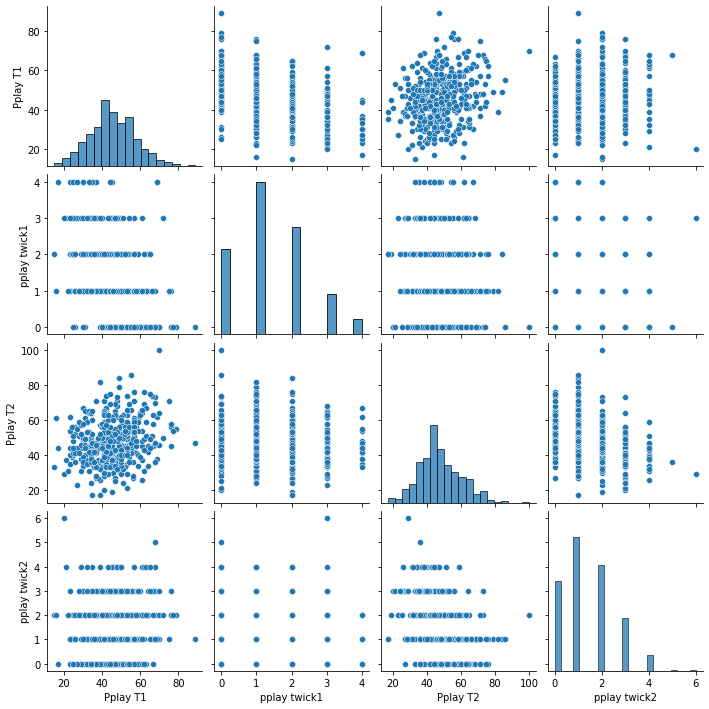

In [11]:
df=matches[['Pplay T1','pplay twick1','Pplay T2','pplay twick2','toss_winner','toss_decision']]

sns.pairplot(df)

In [12]:
matches['team1_homeground'] = 0
matches.loc[(matches['city']=='Mumbai') & (matches['A']=='Mumbai Indians'),'team1_homeground'] = 1
matches.loc[(matches['city']=='Chennai') & (matches['A']=='Chennai Super Kings'),'team1_homeground'] = 1
matches.loc[(matches['city']=='Delhi') & (matches['A']=='Delhi Capitals'),'team1_homeground'] = 1
matches.loc[(matches['city']=='Jaipur') & (matches['A']=='Rajasthan Royals'),'team1_homeground'] = 1
matches.loc[(matches['city']=='Hyderabad') & (matches['A']=='Sunrisers Hyderabad'),'team1_homeground'] = 1
matches.loc[(matches['city']=='Bangalore') & (matches['A']=='Royal Challengers Bangalore'),'team1_homeground'] = 1
matches.loc[(matches['city']=='Chandigarh') & (matches['A']=='Punjab kings'),'team1_homeground'] = 1
matches.loc[(matches['city']=='Kolkata') & (matches['A']=='Kolkata Knight Riders'),'team1_homeground'] = 1

In [13]:
matches.loc[matches.city=='Bengaluru','city']='Bangalore'

In [14]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Kolkata', 'Hyderabad', 'Chennai',
       'Delhi', 'Mumbai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'Johannesburg', 'East London', 'Kimberley',
       'Bloemfontein', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Sharjah',
       'Abu Dhabi', 'Dubai', 'Mohali'], dtype=object)

In [15]:
matches.city[matches.city=='Bangalore'] = 0
matches.city[matches.city=='Chandigarh'] = 1
matches.city[matches.city=='Kolkata'] = 2
matches.city[matches.city=='Hyderabad'] =3
matches.city[matches.city=='Chennai'] =4
matches.city[matches.city=='Delhi'] =5
matches.city[matches.city=='Mumbai'] =6
matches.city[matches.city=='Cape Town'] =7
matches.city[matches.city=='Port Elizabeth'] =8
matches.city[matches.city=='Durban'] =9
matches.city[matches.city=='Centurion'] =10
matches.city[matches.city=='Johannesburg'] =11
matches.city[matches.city=='East London'] =12
matches.city[matches.city=='Kimberley'] =13
matches.city[matches.city=='Bloemfontein'] =14
matches.city[matches.city=='Cuttack'] =15
matches.city[matches.city=='Nagpur'] =16
matches.city[matches.city=='Dharamsala'] =17
matches.city[matches.city=='Kochi'] =18
matches.city[matches.city=='Indore'] =19
matches.city[matches.city=='Visakhapatnam'] =20
matches.city[matches.city=='Pune'] =21
matches.city[matches.city=='Raipur'] =22
matches.city[matches.city=='Ranchi'] =23
matches.city[matches.city=='Sharjah'] =24
matches.city[matches.city=='Abu Dhabi'] =25
matches.city[matches.city=='Dubai'] =26
matches.city[matches.city=='Mohali'] =27



In [16]:
# if Team A is winner then it encoded 0 else 1
matches.winner[matches.winner == matches.A] = 0
matches.winner[matches.winner == matches.B] = 1

In [17]:
#Encoding Team A Names
matches.A[matches.A == "Chennai Super Kings"] = 0 
matches.A[matches.A == "Delhi Capitals"] = 1
matches.A[matches.A == "Kolkata Knight Riders"] = 2
matches.A[matches.A == "Punjab kings"] = 3
matches.A[matches.A == "Mumbai Indians"] = 4
matches.A[matches.A == "Royal Challengers Bangalore"] = 5
matches.A[matches.A == "Rajasthan Royals"] = 6
matches.A[matches.A == "Sunrisers Hyderabad"] = 7


#Encoding Team B Names
matches.B[matches.B == "Chennai Super Kings"] = 0 
matches.B[matches.B == "Delhi Capitals"] = 1
matches.B[matches.B == "Kolkata Knight Riders"] = 2
matches.B[matches.B == "Punjab kings"] = 3
matches.B[matches.B == "Mumbai Indians"] = 4
matches.B[matches.B == "Royal Challengers Bangalore"] = 5
matches.B[matches.B == "Rajasthan Royals"] = 6
matches.B[matches.B == "Sunrisers Hyderabad"] = 7


matches.head()

,city,A,Pplay T1,pplay twick1,B,Pplay T2,pplay twick2,toss_winner,toss_decision,winner,Pitch Type,team1_homeground
0,0,7,61,1,1,26,4,Delhi Capitals,field,0,Batting,0
1,1,4,53,1,2,63,1,Mumbai Indians,bat,0,Batting,0
4,2,5,39,2,7,26,3,Royal Challengers Bangalore,bat,1,Batting,0
6,3,5,25,2,3,48,1,Royal Challengers Bangalore,bat,1,Batting,0
11,4,7,61,3,4,45,0,Sunrisers Hyderabad,bat,1,Batting & Spinner Friendly,0


In [18]:
#Encoding Pitch Type
matches['Pitch Type'][matches['Pitch Type'] == "Batting"] = 0 
matches['Pitch Type'][matches['Pitch Type']== "Both"] = 1
matches['Pitch Type'][matches['Pitch Type'] == "Batting & Spinner Friendly"] = 2
matches['Pitch Type'][matches['Pitch Type'] == "Bowling"] = 3

In [19]:
#Replacing bowl to field in toss_decision column..
matches['toss_decision']=matches['toss_decision'].str.replace('bowl','field')

matches['toss_decision'].value_counts()

field    257
bat      169
Name: toss_decision, dtype: int64

In [20]:
#Encoding Toss Decision
matches['toss_decision'][matches['toss_decision'] == "field"] = 0 
matches['toss_decision'][matches['toss_decision'] == "bat"] = 1

#Encoding Toss winner Names
matches['toss_winner'][matches['toss_winner'] == "Chennai Super Kings"] = 0 
matches['toss_winner'][matches['toss_winner'] == "Delhi Capitals"] = 1
matches['toss_winner'][matches['toss_winner'] == "Kolkata Knight Riders"] = 2
matches['toss_winner'][matches['toss_winner'] == "Punjab kings"] = 3
matches['toss_winner'][matches['toss_winner']== "Mumbai Indians"] = 4
matches['toss_winner'][matches['toss_winner']== "Royal Challengers Bangalore"] = 5
matches['toss_winner'][matches['toss_winner'] == "Rajasthan Royals"] = 6
matches['toss_winner'][matches['toss_winner']== "Sunrisers Hyderabad"] = 7


In [21]:
matches.head()

,city,A,Pplay T1,pplay twick1,B,Pplay T2,pplay twick2,toss_winner,toss_decision,winner,Pitch Type,team1_homeground
0,0,7,61,1,1,26,4,1,0,0,0,0
1,1,4,53,1,2,63,1,4,1,0,0,0
4,2,5,39,2,7,26,3,5,1,1,0,0
6,3,5,25,2,3,48,1,5,1,1,0,0
11,4,7,61,3,4,45,0,7,1,1,2,0


In [22]:
print("City", matches.city.unique())

print("Team1 ", matches.A.unique())

print("Team2", matches.B.unique())

print("Toss winner", matches.toss_winner.unique())

print("Toss Decision", matches.toss_decision.unique())

print("Winner", matches.winner.unique())

print("Pitch Type", matches["Pitch Type"].unique())

print("Team1_homeground", matches.team1_homeground.unique())

City [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Team1  [7 4 5 3 2 1 0 6]
Team2 [1 2 7 3 4 5 6 0]
Toss winner [1 4 5 7 3 2 0 6]
Toss Decision [0 1]
Winner [0 1]
Pitch Type [0 2 1 3]
Team1_homeground [0 1]


In [23]:
matches.drop(['Pplay T1','pplay twick1','Pplay T2','pplay twick2'],axis =1,inplace=True)
matches.head()

,city,A,B,toss_winner,toss_decision,winner,Pitch Type,team1_homeground
0,0,7,1,1,0,0,0,0
1,1,4,2,4,1,0,0,0
4,2,5,7,5,1,1,0,0
6,3,5,3,5,1,1,0,0
11,4,7,4,7,1,1,2,0


In [24]:
t_matches = matches
t_matches

,city,A,B,toss_winner,toss_decision,winner,Pitch Type,team1_homeground
0,0,7,1,1,0,0,0,0
1,1,4,2,4,1,0,0,0
4,2,5,7,5,1,1,0,0
6,3,5,3,5,1,1,0,0
11,4,7,4,7,1,1,2,0
...,...,...,...,...,...,...,...,...
803,24,1,7,7,0,1,0,0
804,25,4,2,4,0,0,0,0
806,25,1,1,1,0,0,0,0
809,25,7,1,7,0,0,0,0


In [25]:
print(t_matches.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 810
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              426 non-null    object
 1   A                 426 non-null    object
 2   B                 426 non-null    object
 3   toss_winner       426 non-null    object
 4   toss_decision     426 non-null    object
 5   winner            426 non-null    object
 6   Pitch Type        426 non-null    object
 7   team1_homeground  426 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 30.0+ KB
None


In [26]:
t_matches['winner'] = t_matches.winner.astype('int64')
t_matches['city'] = t_matches.city.astype('int64')
t_matches['toss_decision'] = t_matches.toss_decision.astype('int64')
t_matches['Pitch Type'] = t_matches['Pitch Type'].astype('int64')
t_matches['team1_homeground'] = t_matches.team1_homeground.astype('int64')
t_matches['A'] = t_matches.A.astype('int64')
t_matches['B'] = t_matches.B.astype('int64')

t_matches

,city,A,B,toss_winner,toss_decision,winner,Pitch Type,team1_homeground
0,0,7,1,1,0,0,0,0
1,1,4,2,4,1,0,0,0
4,2,5,7,5,1,1,0,0
6,3,5,3,5,1,1,0,0
11,4,7,4,7,1,1,2,0
...,...,...,...,...,...,...,...,...
803,24,1,7,7,0,1,0,0
804,25,4,2,4,0,0,0,0
806,25,1,1,1,0,0,0,0
809,25,7,1,7,0,0,0,0


In [27]:
t_matches.loc[t_matches.toss_winner==t_matches['A'],'team1_toss_win'] = 1
t_matches.loc[t_matches.toss_winner!=t_matches['A'],'team1_toss_win'] = 0

t_matches['team1_toss_win'] = t_matches.team1_toss_win.astype('int64')


In [28]:
t_matches.drop('toss_winner',axis=1,inplace=True)
t_matches

,city,A,B,toss_decision,winner,Pitch Type,team1_homeground,team1_toss_win
0,0,7,1,0,0,0,0,0
1,1,4,2,1,0,0,0,1
4,2,5,7,1,1,0,0,1
6,3,5,3,1,1,0,0,1
11,4,7,4,1,1,2,0,1
...,...,...,...,...,...,...,...,...
803,24,1,7,0,1,0,0,0
804,25,4,2,0,0,0,0,1
806,25,1,1,0,0,0,0,1
809,25,7,1,0,0,0,0,1


In [29]:
#t_matches.drop('team1_homeground',axis=1,inplace=True)
t_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 810
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   city              426 non-null    int64
 1   A                 426 non-null    int64
 2   B                 426 non-null    int64
 3   toss_decision     426 non-null    int64
 4   winner            426 non-null    int64
 5   Pitch Type        426 non-null    int64
 6   team1_homeground  426 non-null    int64
 7   team1_toss_win    426 non-null    int64
dtypes: int64(8)
memory usage: 30.0 KB


In [30]:
t_matches = t_matches[['A','B','team1_toss_win','toss_decision','team1_homeground','Pitch Type','winner']]
t_matches

,A,B,team1_toss_win,toss_decision,team1_homeground,Pitch Type,winner
0,7,1,0,0,0,0,0
1,4,2,1,1,0,0,0
4,5,7,1,1,0,0,1
6,5,3,1,1,0,0,1
11,7,4,1,1,0,2,1
...,...,...,...,...,...,...,...
803,1,7,0,0,0,0,1
804,4,2,1,0,0,0,0
806,1,1,1,0,0,0,0
809,7,1,1,0,0,0,0


## Logistic Regression

In [31]:
#Model 1:-

y = t_matches.winner.values  #Adding Winner Column into y
X = t_matches.drop(columns=["winner"], axis=1).values  # features column

#Test Size of 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=12345)

In [32]:
#Data Preprocessing
#from sklearn.preprocessing import StandardScaler
#sc_x= StandardScaler()
#X_train=sc_x.fit_transform(X_train)
#X_test=sc_x.transform(X_test)

# Passing Logistic regression
from sklearn.linear_model._logistic import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

#Predicting on Test Set
y_pred1 = lr.predict(X_test)

#Importing Accuracy Score from Metrics
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm1 = confusion_matrix(y_test, y_pred1)

Accuracy: 62.79%


In [33]:
#Classification Report
print("Classification Report")
print(classification_report(y_test, y_pred1))

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        44
           1       0.59      0.81      0.68        42

    accuracy                           0.63        86
   macro avg       0.65      0.63      0.62        86
weighted avg       0.65      0.63      0.62        86



**Test Prediction**

In [34]:
#team1, team2, team1_toss_win, toss_decision, team1_homeground,Pitch type
a = [0, 4, 1, 0, 1, 0]
b = [0, 4, 1, 1, 1, 0]
c = [0, 4, 0, 0, 1, 0]
d = [0, 4, 0, 1, 1, 0]
a = np.array(a)
a = a.reshape(1,6)
b = np.array(b)
b = b.reshape(1,6)
c = np.array(c)
c = c.reshape(1,6)
d = np.array(d)
d = d.reshape(1,6)

In [35]:
print("a",lr.predict(a))
print("b",lr.predict(b))
print("c",lr.predict(c))
print("d",lr.predict(d))

a [0]
b [0]
c [0]
d [1]


In [36]:
#team1, team2, team1_toss_win, toss_decision, team1_homeground,Pitch type
a = [4, 0, 1, 0, 0, 0]
b = [4, 0, 1, 1, 0, 1]
c = [4, 0, 0, 0, 0, 2]
d = [4, 0, 0, 1, 0, 3]
a = np.array(a)
a = a.reshape(1,6)
b = np.array(b)
b = b.reshape(1,6)
c = np.array(c)
c = c.reshape(1,6)
d = np.array(d)
d = d.reshape(1,6)

In [37]:
print("a",lr.predict(a))
print("b",lr.predict(b))
print("c",lr.predict(c))
print("d",lr.predict(d))

a [0]
b [1]
c [1]
d [1]


In [38]:
import pickle
file = open('logistic_regression.pkl', 'wb')

pickle.dump(lr, file)

## SVM

In [39]:
# Model
from sklearn.svm import SVC
# Fitting SVM model
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('Accuracy of SVM Classifier on test set: {:.2f}%'.format(
    svm.score(X_test, y_test) * 100))

Accuracy of SVM Classifier on test set: 59.30%


## Random Forest

In [40]:
# Model 2:-

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred2 = classifier.predict(X_test)

#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cmm = confusion_matrix(y_test, y_pred2)

#So, from Random Forrest Algorithm we achieved an accuracy of 64% on test data

Accuracy: 58.14%


## Decision Tree

In [41]:
#Model 3:- ( Decision Tree)

# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

# Predicting the Test set results
y_pred4 = dtree.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred4)


from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Dtree also has a bad accuracy score.

Accuracy: 55.81%
